# **Data Pre-Processing**

In [1]:
##### Standard Libraries #####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_context ("poster")
%matplotlib inline

## ### For Preprocessing #####
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2,SelectKBest,f_classif
from imblearn.over_sampling import SMOTE

##### For Building the Model
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import make_pipeline

##### For Validation of the Model
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error , classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

#### another important libraries
from sklearn import datasets
from scipy.stats import uniform
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
d =datasets.load_digits()
x_label = d.data
y_label = d.target

In [3]:
d

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
x_label

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
y_label

array([0, 1, 2, ..., 8, 9, 8])

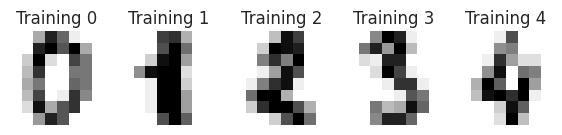

In [6]:
#let's visulaize some of the data

f,axes = plt.subplots(nrows = 1, ncols = 5 ,figsize=(7,7))
for ax, image, label in zip(axes, d.images , d.target):
  ax.set_axis_off() # to turn off the axes of a subplot or plot
  ax.imshow(image,cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training %i" % label)
plt.show()

# **Let's Build the models for this dataset**

### **1- Random Forest(RM)**

In [7]:
#initializatrion of the model by taking an object from RandomForestClassifier()
rfc =RandomForestClassifier()

#fitting this model with our data
rfc.fit(x_label,y_label)

#measuring the accuracy of this model
scores1 = cross_val_score(rfc,x_label,y_label, cv=7  , scoring = "accuracy")
accuracy_formatted1 = "{:.2f}".format(np.mean(scores1) * 100)
print(f"The accuracy of Random Forest Classifier Model is: {accuracy_formatted1} %")


The accuracy of Random Forest Classifier Model is: 93.38 %


### **2- Support Vector Machine(SVM)**

In [8]:
#initializatrion of the model by taking an object from RandomForestClassifier()
svc =SVC()

#fitting this model with our data
svc.fit(x_label,y_label)

#measuring the accuracy of this model
scores2 = cross_val_score(svc,x_label,y_label, cv=7  , scoring = "accuracy")
accuracy_formatted2 = "{:.2f}".format(np.mean(scores2) * 100)
print(f"The accuracy of Support Vector Classifier Model is: {accuracy_formatted2} %")


The accuracy of Support Vector Classifier Model is: 96.66 %


### **3- K-nearst-Neighbors(KNN)**

In [9]:
#initializatrion of the model by taking an object from RandomForestClassifier()
knn =KNeighborsClassifier()

#fitting this model with our data
knn.fit(x_label,y_label)

#measuring the accuracy of this model
scores3 = cross_val_score(knn,x_label,y_label, cv=7  , scoring = "accuracy")
accuracy_formatted3 = "{:.2f}".format(np.mean(scores3) * 100)
print(f"The accuracy of K-nearst-Neighbors Model is: {accuracy_formatted3} %")

The accuracy of K-nearst-Neighbors Model is: 96.55 %


________________________________________________________________________________________________________________________________________________________________

# **Grid Search Technique**

### **1- Random Forest(RF)**

In [10]:
# Define the parameter grid you want to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    "criterion": ["gini", "entropy"]}

# Create the RandomForestClassifier
rfc = RandomForestClassifier()

# Create a GridSearchCV object
grid = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid.fit(x_label, y_label)

# Access the best parameters and best score
best_params11 = grid.best_params_
best_score11 = grid.best_score_

# Calculate and print the accuracy with 2 decimal places
print("Best Parameters :", best_params11)
accuracy_formatted11 = "{:.2f}".format(best_score11 * 100)
print(f"The accuracy of Random Forest Classifier Model with Grid Search is: {accuracy_formatted11} %")


Best Parameters : {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 50}
The accuracy of Random Forest Classifier Model with Grid Search is: 94.10 %


### **2- K-nearst-Neighbors(KNN)**

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define the parameter grid you want to search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # For Manhattan and Euclidean distances
}

# Create the KNeighborsClassifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid.fit(x_label, y_label)

# Access the best parameters and best score
best_params22 = grid.best_params_
best_score22 = grid.best_score_

# Calculate and print the accuracy with 2 decimal places
print("Best Parameters:", best_params22)
accuracy_formatted22 = "{:.2f}".format(best_score22 * 100)
print(f"The accuracy of K-Nearest Neighbors Model with Grid Search is: {accuracy_formatted22} %")


Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
The accuracy of K-Nearest Neighbors Model with Grid Search is: 96.66 %


# **Random Search Technique**

### **1- Random Forest(RF)**

In [12]:
# Define the parameter distribution you want to search
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

# Create the RandomForestClassifier
rfc = RandomForestClassifier()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=30, cv=7, scoring='accuracy', random_state=42)

# Fit the random search to your data
random = random_search.fit(x_label, y_label)

# Access the best parameters and best score
best_params111 = random.best_params_
print("Best Parameters:", best_params111)

# Access the best score
best_score111 = random.best_score_

# Calculate and print the accuracy with 2 decimal places
accuracy_formatted111 = "{:.2f}".format(best_score111 * 100)
print(f"The accuracy of Random Forest Classifier Model with Randomized Search is: {accuracy_formatted111} %")


Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
The accuracy of Random Forest Classifier Model with Randomized Search is: 94.21 %


### **2- Support Vector Machine(SVM)**

In [13]:
# Define the parameter distribution you want to search
param_dist = {
    'C': uniform(loc=0, scale=10),  # Penalty parameter C
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Create the SVM classifier
svm = SVC()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the random search to your data
random_search.fit(x_label, y_label)

# Access the best parameters and best score
best_params222 = random_search.best_params_
print("Best Parameters:", best_params222)

# Access the best score
best_score222 = random_search.best_score_

# Calculate and print the accuracy with 2 decimal places
accuracy_formatted222 = "{:.2f}".format(best_score222 * 100)
print(f"The accuracy of Support Vector Machine Model with Randomized Search is: {accuracy_formatted222} %")


Best Parameters: {'C': 3.745401188473625, 'degree': 2, 'kernel': 'rbf'}
The accuracy of Support Vector Machine Model with Randomized Search is: 97.39 %


### **3- K-nearst-Neighbors(KNN)**

In [14]:
# Define the parameter distribution you want to search
param_dist = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # For Manhattan and Euclidean distances
}

# Create the KNeighborsClassifier
knn = KNeighborsClassifier()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the random search to your data
random_search.fit(x_label, y_label)

# Access the best parameters and best score
best_params333 = random_search.best_params_
print("Best Parameters:", best_params333)

# Access the best score
best_score333 = random_search.best_score_

# Calculate and print the accuracy with 2 decimal places
accuracy_formatted333 = "{:.2f}".format(best_score333 * 100)
print(f"The accuracy of K-Nearest Neighbors Model with Randomized Search is: {accuracy_formatted333} %")


Best Parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 3}
The accuracy of K-Nearest Neighbors Model with Randomized Search is: 96.61 %


# **The Final Result**

In [24]:
print(f"The accuracy of Random Forest Classifier Model is: {accuracy_formatted1} %")
print('__________________________________________________')
print(f"The accuracy of Support Vector Classifier Model is: {accuracy_formatted2} %")
print('___________________________________________________')
print(f"The accuracy of K-nearst-Neighbors Model is: {accuracy_formatted3} %")
print('_____________________________________________')
print(f"The accuracy of Random Forest Classifier Model with Grid Search is: {accuracy_formatted11} %")
print('____________________________________________________________')
print(f"The accuracy of K-Nearest Neighbors Model with Grid Search is: {accuracy_formatted22} %")
print('_______________________________________________________________')
print(f"The accuracy of Random Forest Classifier Model with Randomized Search is: {accuracy_formatted111} %")
print('___________________________________________________________________')
print(f"The accuracy of Support Vector Classifier  Model with Randomized Search is: {accuracy_formatted222} %")
print('_____________________________________________________________________')
print(f"The accuracy of K-Nearest Neighbors Model with Randomized Search is: {accuracy_formatted333} %")

The accuracy of Random Forest Classifier Model is: 93.38 %
__________________________________________________
The accuracy of Support Vector Classifier Model is: 96.66 %
___________________________________________________
The accuracy of K-nearst-Neighbors Model is: 96.55 %
_____________________________________________
The accuracy of Random Forest Classifier Model with Grid Search is: 94.10 %
____________________________________________________________
The accuracy of K-Nearest Neighbors Model with Grid Search is: 96.66 %
_______________________________________________________________
The accuracy of Random Forest Classifier Model with Randomized Search is: 94.21 %
___________________________________________________________________
The accuracy of Support Vector Classifier  Model with Randomized Search is: 97.39 %
_____________________________________________________________________
The accuracy of K-Nearest Neighbors Model with Randomized Search is: 96.61 %


### **So after trainig all this model I found that The accuracy of Support Vector Classifier Model with Randomized Search is the highest accuracy which is 97.39 ✅**